In [6]:
import tensorflow as tf
import pandas as pd
import numpy as np

data = pd.read_csv("song_data.csv").to_numpy()
song_names = data[:, 0]
song_labels = data[:, 1].reshape(len(data), 1).astype('float64')
song_data = data[:, 1:]

In [7]:
import sys
sys.path.append("../../")
from utils.preprocess import std
from utils.preprocess import split_train_test
# song_data = std(song_data)
train_data, train_label, test_data, test_label = split_train_test(song_data, song_labels)
train_data, test_data = std(train_data), std(test_data)
train_data, train_label, test_data, test_label = tf.convert_to_tensor(train_data, tf.float32), tf.convert_to_tensor(train_label, tf.float32), tf.convert_to_tensor(test_data,tf.float32), tf.convert_to_tensor(test_label, tf.float32)


In [8]:
# 数据生成器
def data_generator(train_data, train_label, batch_size=20):
    n_ = len(train_data)
    indicates = list(range(n_))
    tf.random.shuffle(indicates)
    for batch in range(0, n_, batch_size):
        chose = tf.constant(indicates[batch: min(batch + batch_size, n_)])
        yield tf.gather(train_data, chose), tf.gather(train_label, chose)


# 定义模型
def liner_regression(X, w, b):
    return tf.matmul(X, w) + b

# 定义损失函数，均值方差
def loss(y_hat, y):
    return (y_hat - y) ** 2 / 2

epoch: 1, test loss: 110.7847900390625
epoch: 2, test loss: 53.635128021240234
epoch: 3, test loss: 26.4747257232666
epoch: 4, test loss: 13.34717845916748
epoch: 5, test loss: 6.894477844238281
epoch: 6, test loss: 3.665008544921875
epoch: 7, test loss: 2.016911029815674
epoch: 8, test loss: 1.158096194267273
epoch: 9, test loss: 0.7005805969238281
epoch: 10, test loss: 0.45122265815734863
epoch: 11, test loss: 0.3120880722999573
epoch: 12, test loss: 0.2325950264930725
epoch: 13, test loss: 0.1860940158367157
epoch: 14, test loss: 0.1582423448562622
epoch: 15, test loss: 0.14116784930229187
epoch: 16, test loss: 0.13045097887516022
epoch: 17, test loss: 0.12356610596179962
epoch: 18, test loss: 0.11903305351734161
epoch: 19, test loss: 0.11597520112991333
epoch: 20, test loss: 0.11386191844940186
epoch: 21, test loss: 0.1123591735959053
epoch: 22, test loss: 0.11126600205898285
epoch: 23, test loss: 0.11044394969940186
epoch: 24, test loss: 0.10981246083974838
epoch: 25, test loss: 0

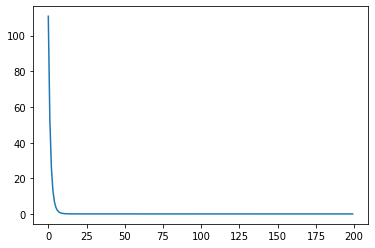

In [21]:
# 开始训练
epochs = 200
eta = 1e-1
batch_size = 200
w = tf.Variable(tf.random.normal(shape=(train_data.shape[1], 1), mean=0, stddev=.01), trainable=True)
b = tf.Variable(tf.zeros(1), trainable=True)
losses = np.zeros(epochs)
for epoch in range(epochs):
    for X, y in data_generator(train_data, train_label, batch_size):
        # 自动微分
        with tf.GradientTape() as g:
            y_hat = liner_regression(X, w, b)
            l = loss(y_hat, y)
        # 计算梯度
        gw, gb = g.gradient(l, [w, b])
        # 更新参数
        w.assign_sub(eta * gw / batch_size)
        b.assign_sub(eta * gb / batch_size)
    l = loss(liner_regression(test_data, w, b), test_label)
    losses[epoch] = tf.reduce_mean(l)
    print(f'epoch: {epoch + 1}, test loss: {tf.reduce_mean(l)}')

from matplotlib import pyplot as plt

plt.plot(losses)

In [22]:
liner_regression(test_data[:10], w, b), test_label[:10]

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[60.54294 ],
        [65.54213 ],
        [66.5447  ],
        [31.540136],
        [45.54476 ],
        [25.546875],
        [28.541712],
        [75.54021 ],
        [53.5397  ],
        [55.542458]], dtype=float32)>,
 <tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[61.],
        [66.],
        [67.],
        [32.],
        [46.],
        [26.],
        [29.],
        [76.],
        [54.],
        [56.]], dtype=float32)>)

In [23]:
w, b

(<tf.Variable 'Variable:0' shape=(14, 1) dtype=float32, numpy=
 array([[ 9.9999405e+01],
        [-2.7675631e-02],
        [-8.0343464e-04],
        [-3.9976137e-03],
        [-9.1706300e-03],
        [ 2.5522949e-03],
        [ 4.6974495e-05],
        [ 2.6197862e-04],
        [ 2.4553299e-02],
        [-3.8399747e-05],
        [ 2.0770893e-04],
        [-8.4634539e-04],
        [ 5.9826924e-03],
        [ 1.4564444e-03]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([52.900337], dtype=float32)>)